# Лабораторная работа №2
## по предмету "Системы искусственного интеллекта"

В данной лабораторной работе вы будете работать с набором данных, который содержит информацию о технических характеристиках ноутбуков и их цену.
Целью работы является изучение теоретических основ методов машинного обучения.

В наборе данных для лабораторной работы содержится абор характеристик  мобильных телефонов, включая мощность аккумулятора, характеристики камеры, поддержку сети, память, размеры экрана и другие атрибуты. Столбец «price_range» классифицирует телефоны по ценовым диапазонам (этот столбец необходимо предсказать).

### Задание 1

Выгрузите данные из датасета. Изучите колонки, проверьте наличие пропусков. Постройте матрицу корреляции между признаками и целевой переменной. Сделайте выводы, что показывает эта матрица.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Datasets/AIS2.csv')
X = df.drop(columns='price_range')
y = df['price_range']
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
gi = pd.DataFrame(df.corr()['price_range'].sort_values(ascending=False))

<Axes: >

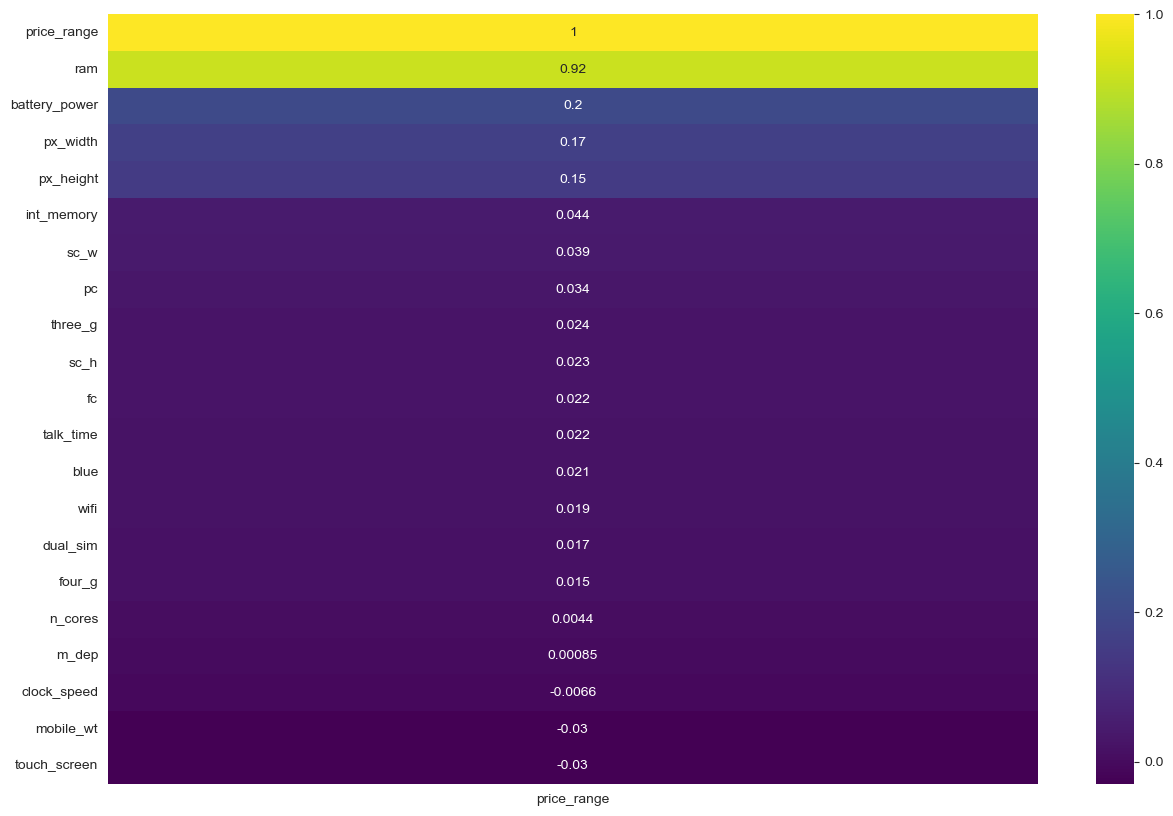

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(gi, annot=True, cmap='viridis')

### Задание 2

Реализуйте с нуля алгоритм логистической регрессии для многоклассовой классификации.

In [53]:
class LogisticRegression:
  def __init__(self, num_classes):
    """
    Initializes the logistic regression model.

    Parameters:
        num_classes (int): The number of classes in the classification problem.
    """
    self.num_classes = num_classes
    self.weights = None

  def _sigmoid(self, x):
    """
    Computes the sigmoid function for a given array.

    Parameters:
        x (numpy.array): The input array.

    Returns:
        numpy.array: The output of the sigmoid function.
    """
    return 1 / (1 + np.exp(-x))

  def fit(self, X, y):
    """
    Fits the model to the training data.

    Parameters:
        X (numpy.array): The feature matrix.
        y (numpy.array): The target vector.
    """
    n_samples, n_features = X.shape
    self.weights = np.random.rand(n_features, self.num_classes)

    for _ in range(100):  # You can adjust the number of iterations here
      predictions = self._sigmoid(np.dot(X, self.weights))
      predictions_class = np.argmax(predictions, axis=1)
      labels_onehot = np.eye(self.num_classes)[y]

      # Compute the cross-entropy loss
      loss = -np.mean(labels_onehot * np.log(predictions))

      # Compute the gradients of the loss with respect to the weights
      dW = np.dot(X.T, (predictions - labels_onehot))
      self.weights -= 0.01 * dW

  def predict(self, X):
    """
    Makes predictions on new data.

    Parameters:
        X (numpy.array): The feature matrix.

    Returns:
        numpy.array: The predicted class labels.
    """
    predictions = self._sigmoid(np.dot(X, self.weights))
    return np.argmax(predictions, axis=1)

  def evaluate(self, X_test, y_test):
    """
    Evaluates the model on test data and returns the accuracy.

    Parameters:
        X_test (numpy.array): The feature matrix of the test data.
        y_test (numpy.array): The target vector of the test data.

    Returns:
        float: The accuracy of the model's predictions.
    """
    predictions = self.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    return accuracy


In [54]:
X = (X - X.mean()) / X.std()

num_classes: int = len(y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
model = LogisticRegression(num_classes=num_classes)
model.fit(X_train, y_train)
accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5416666666666666


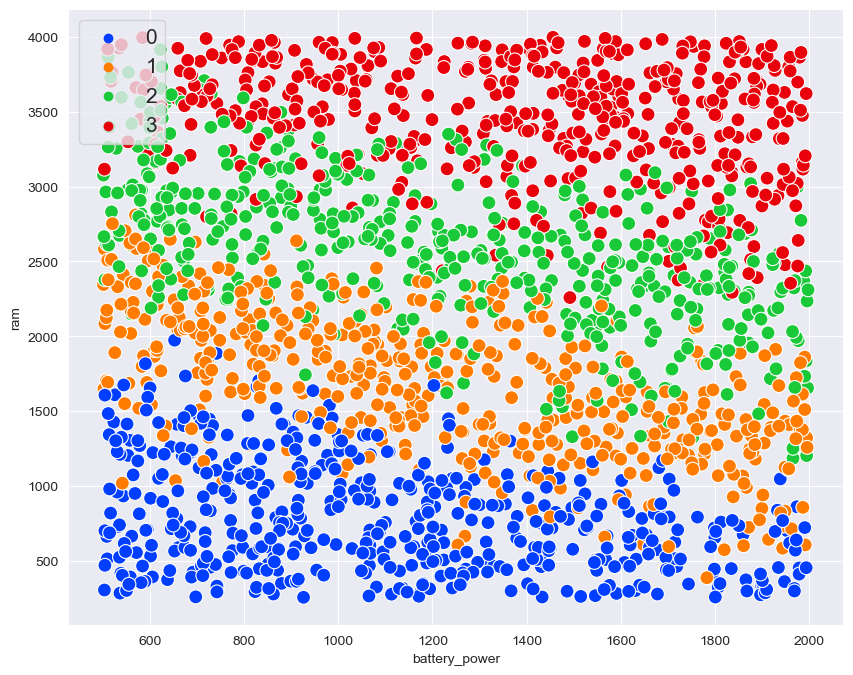

In [11]:
plt.figure(figsize = (10, 8))

sns.scatterplot(x = df['battery_power'], y = df['ram'], hue = df['price_range'], palette = 'bright', s = 100)

plt.legend(loc = 'upper left', prop = {'size': 15})
plt.show()

Обучите модель.

### Задание 3

Реализуйте с нуля алгоритм Наивный Байес.

In [239]:
class NaiveBayes:
  def __init__(self):
    self.classes = None
    self.mean = {}
    self.stddev = {}
    self.priors = {}

  def _gaussian_likelihood(self, x, class_label):
    """Рассчитывает вероятность данных признаков для конкретного класса"""
    numerator = np.exp(-((x - self.mean[class_label]) / (2 * self.stddev[class_label] ** 2)))
    denominator = np.sqrt(2 * np.pi * self.stddev[class_label] ** 2)
    return numerator / denominator

  def _predict(self, test_data):
    """Рассчитывает предсказания по тестовым данным"""
    predictions = []
    for sample in test_data:
      log_likelihoods = {}
      for class_label in self.classes:
        log_likelihood = np.sum(np.log(self._gaussian_likelihood(sample, class_label)))
        log_likelihoods[class_label] = log_likelihood + np.log(self.priors[class_label])
      max_log_likelihood_class = max(log_likelihoods, key=log_likelihoods.get)
      predictions.append(max_log_likelihood_class)
    return np.array(predictions)

  def fit(self, X, y):
    """Обучает Naive Bayes"""
    self.classes = set(y)
    for class_label in self.classes:
      x_for_class = [X[i] for i in range(len(X)) if y[i] == class_label]
      mean_vector = np.mean(x_for_class, axis=0)
      stddev_vector = np.std(x_for_class, axis=0)

      self.mean[class_label] = mean_vector
      self.stddev[class_label] = stddev_vector
      count = sum(y == class_label)
      self.priors[class_label] = count / len(y)


# Загрузка данных
df = pd.read_csv('Datasets/AIS2.csv')
X = df.drop(columns='price_range')
y = df['price_range']


X_np = np.array(X)
y_np = np.array(y)
# Разделение данных на обучающую и тестовую выборки.
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=test_size, random_state=42)

# Обучаем Naive Bayes
model = NaiveBayes()
model.fit(X_train, y_train)

# Делаем предсказание на тестовой выборке
predictions = model._predict(X_test)

accuracy = accuracy_score(y_test, predictions)
accuracy

Обучите модель.

In [244]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7975

### Задание 4

Реализуйте с нуля алгоритм kNN.

In [265]:
class KNN:
  def __init__(self, k):
    self.k = k  # Количество ближайших соседей для подсчета прогноза

  def fit(self, X_train, y_train):
    """
    Подготовка модели.

    :param X_train: Данные обучения
    :param y_train: Метки обучения
    """
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    """
    Предсказание для новых данных.

    :param X_test: Данные для предсказания
    :return: Прогнозы классов
    """
    predictions = []
    for x in X_test:
      distances = np.linalg.norm(self.X_train - x, axis=1)  # Расчет расстояния до каждого обучающего образца
      indices = np.argsort(distances)[:self.k]  # Идентификаторы k ближайших соседей
      labels = self.y_train[indices]
      prediction = np.bincount(labels).argmax()  # Выбор наиболее часто встречающегося класса
      predictions.append(prediction)
    return np.array(predictions)

Обучите модель.

In [266]:
# Загрузка данных
df = pd.read_csv('Datasets/AIS2.csv')
X = df.drop(columns='price_range')
y = df['price_range']

X_np = np.array(X)
y_np = np.array(y)

# Разделение данных на обучающую и тестовую выборки.
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=test_size, random_state=42)


knn = KNN(k=7)  # Создание экземпляра классификатора kNN с k=7
knn.fit(X_train, y_train)  # Подготовка модели

predictions = knn.predict(X_test)  # Предсказание меток
print(accuracy_score(y_test, predictions))  # Вывод прогнозов классов

0.955
